In [1]:
import pandas as pd
from sklearn import *
import numpy as np

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [5]:
# dependent variable/target varible/label
label = "default"

# independepent variables/features/predictors
X = df.drop(columns=[label])


# vector for target variable
y = df[label]

# one hot encoding to conver categorical features into numeric
# drop_first: remove first value of a categorical feature ... it is redundant
X = pd.get_dummies(X, drop_first=True)

# Creating trainnig and test sets
# test_size is 30% of the whole
# random_state: to reprduce the same combination of training and test records
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values,                       
                                    y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

# prediction on training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [7]:
print("Training accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("Training precision", metrics.precision_score(y_train, y_train_pred))
print("Test precision", metrics.precision_score(y_test, y_test_pred))
print("Training recall", metrics.recall_score(y_train, y_train_pred))
print("Test recall", metrics.recall_score(y_test, y_test_pred))

Training accuracy 0.7957142857142857
Test accuracy 0.7566666666666667
Training precision 0.8304431599229287
Test precision 0.8
Training recall 0.8868312757201646
Test recall 0.8785046728971962


In [8]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 2, 1)
print(metrics.confusion_matrix(y_test,y_test_pred))
print("Training accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("Training precision", metrics.precision_score(y_train, y_train_pred))
print("Test precision", metrics.precision_score(y_test, y_test_pred))
print("Training recall", metrics.recall_score(y_train, y_train_pred))
print("Test recall", metrics.recall_score(y_test, y_test_pred))

[[188  26]
 [ 47  39]]
Training accuracy 0.7957142857142857
Test accuracy 0.7566666666666667
Training precision 0.8304431599229287
Test precision 0.8
Training recall 0.8868312757201646
Test recall 0.8785046728971962


In [9]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.2, 2, 1)
print(metrics.confusion_matrix(y_test,y_test_pred))
print("Training accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("Training precision", metrics.precision_score(y_train, y_train_pred))
print("Test precision", metrics.precision_score(y_test, y_test_pred))
print("Training recall", metrics.recall_score(y_train, y_train_pred))
print("Test recall", metrics.recall_score(y_test, y_test_pred))

[[129  85]
 [ 21  65]]
Training accuracy 0.7957142857142857
Test accuracy 0.6466666666666666
Training precision 0.8304431599229287
Test precision 0.86
Training recall 0.8868312757201646
Test recall 0.602803738317757


In [10]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 2, 1)
print(metrics.confusion_matrix(y_test,y_test_pred))
print("Training accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("Training precision", metrics.precision_score(y_train, y_train_pred))
print("Test precision", metrics.precision_score(y_test, y_test_pred))
print("Training recall", metrics.recall_score(y_train, y_train_pred))
print("Test recall", metrics.recall_score(y_test, y_test_pred))

[[209   5]
 [ 71  15]]
Training accuracy 0.7957142857142857
Test accuracy 0.7466666666666667
Training precision 0.8304431599229287
Test precision 0.7464285714285714
Training recall 0.8868312757201646
Test recall 0.9766355140186916


In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob, pos_label=2)
pd.DataFrame({"fpr":fpr,"tpr": tpr,"thresholds": thresholds}).head()

,fpr,tpr,thresholds
0,0.000000,0.000000,1.961698
1,0.000000,0.011628,0.961698
2,0.014019,0.011628,0.930588
3,0.014019,0.174419,0.822168
4,0.023364,0.174419,0.805632


In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC, auc: 0.7585')

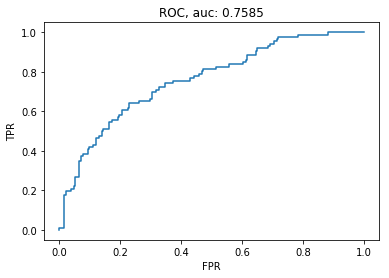

In [14]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %.4f" % metrics.auc(fpr, tpr))

In [15]:
est = pipe.steps[-1][-1]
est

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
len(X.columns)

48

In [19]:
est.coef_.shape

(1, 48)

In [21]:
est.coef_.flatten().shape

(48,)

In [22]:
est.coef_.squeeze().shape

(48,)

In [23]:
pd.DataFrame({"feature": X.columns, "weight": est.coef_.flatten()}) 


,feature,weight
0,months_loan_duration,0.312818
1,amount,0.445245
2,installment_rate,0.490867
3,residence_history,0.108905
4,age,-0.288007
5,existing_credits,0.307900
6,dependents,0.117148
7,checking_balance_< 0 DM,0.181951
8,checking_balance_> 200 DM,-0.081422
9,checking_balance_unknown,-0.574947


In [34]:
# dependent variable/target varible/label
label = "default"

# independepent variables/features/predictors
X = df.drop(columns=[label])


# vector for target variable
y = df[label]

# one hot encoding to conver categorical features into numeric
# drop_first: remove first value of a categorical feature ... it is redundant
X = pd.get_dummies(X, drop_first=True)

# Creating trainnig and test sets
# test_size is 30% of the whole
# random_state: to reprduce the same combination of training and test records
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values,                       
                                    y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                                , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=0.087))
])

pipe.fit(X_train, y_train)

# prediction on training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 2, 1)
print(metrics.confusion_matrix(y_test,y_test_pred))
print("Training accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("Training precision", metrics.precision_score(y_train, y_train_pred))
print("Test precision", metrics.precision_score(y_test, y_test_pred))
print("Training recall", metrics.recall_score(y_train, y_train_pred))
print("Test recall", metrics.recall_score(y_test, y_test_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[177  37]
 [ 43  43]]
Training accuracy 0.9728571428571429
Test accuracy 0.7333333333333333
Training precision 0.9755600814663951
Test precision 0.8045454545454546
Training recall 0.98559670781893
Test recall 0.8271028037383178


In [27]:
np.linspace(0.01, .2, 10)

array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ])

In [41]:
%%time 

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=0.1, solver="liblinear"))
])

param_grid = {
    "est__C": np.linspace(0.08, .1, 20)
}

gsearch = model_selection.GridSearchCV(pipe, param_grid, cv = 5, verbose=True, n_jobs=12)
gsearch.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


CPU times: user 85 ms, sys: 8.53 ms, total: 93.5 ms
Wall time: 246 ms


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [42]:
gsearch.best_params_, gsearch.best_score_

({'est__C': 0.08526315789473685}, 0.752)

In [43]:
gsearch.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=0.08526315789473685, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])